**In this notebbook, I'm using yolov5 to detect objects in the given dataset, The dataset contains photos of street and I'm going to use a pre-trained yolov5 from pytorch hub and see how it works on the dataset.
Let's start this project!**

# Step 1 | Installing libraries

In [2]:
pip install -U ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/52/8b/bb80f6d2f2b1abc61792232207935080a2c3c32e19c734a3f02a5cf0aea9/ultralytics-8.0.223-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.4/659.4 kB 12.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import torch
import torchvision
import cv2
import random
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# Step 2 | loading pre-trained yolov5s from pytorch

In [4]:
# loading the pre-trained yolov5 model from pytorch
yolov5 = torch.hub.load("ultralytics/yolov5", "yolov5s", pretrained=True)

/opt/conda/lib/python3.10/site-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirement ['Pillow>=10.0.1'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 10.8s, installed 1 package: ['Pillow>=10.0.1']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2023-12-7 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 41.0MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
# selectin one imge as a test image
test_img_path = "/kaggle/input/images-for-object-detection/yolo_2222/yolo/1478019958179775471.jpg"

In [8]:
# passing the test image to the model 
detected_results = yolov5(test_img_path)

In [9]:
# let's see the predictions
detected_results.print()

image 1/1: 300x480 2 cars, 1 truck
Speed: 32.9ms pre-process, 68.7ms inference, 23.9ms NMS per image at shape (1, 3, 416, 640)


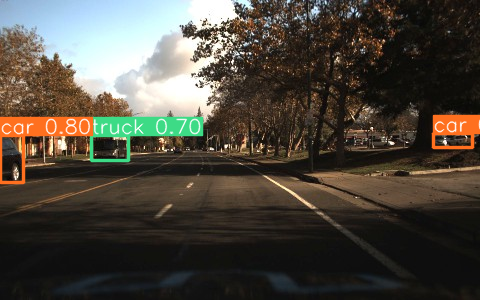

In [10]:
# now let's see the detected result
detected_results.show()

In [23]:
# you can also see the details of detected objects using the code below 

resultyolov5s_df = detected_results.pandas().xyxy[0] 
resultyolov5s_df

,xmin,ymin,xmax,ymax,confidence,class,name
0,0.151493,135.245728,23.855783,182.555054,0.797482,2,car
1,91.040833,135.550995,128.443420,160.735260,0.698054,7,truck
2,433.844055,133.333313,472.839203,147.996872,0.320636,2,car


# Step 3 | loading pre-trained yolov5l from pytorch

In [24]:
# this time I want to choose tolov5l to see how this one works 
yolov5l = torch.hub.load('ultralytics/yolov5', 'yolov5l', pretrained=True)

requirements: Ultralytics requirement ['Pillow>=10.0.1'] not found, attempting AutoUpdate...


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master



requirements: AutoUpdate success ✅ 10.7s, installed 1 package: ['Pillow>=10.0.1']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2023-12-7 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

100%|██████████| 89.3M/89.3M [00:01<00:00, 89.4MB/s]

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


In [25]:
# passing the test image to yolov5l
detectedyolov5l_img_result = yolov5l(test_img_path)

In [26]:
# printing the results
detectedyolov5l_img_result.print()

image 1/1: 300x480 5 cars, 1 bus
Speed: 6.9ms pre-process, 46.8ms inference, 1.5ms NMS per image at shape (1, 3, 416, 640)


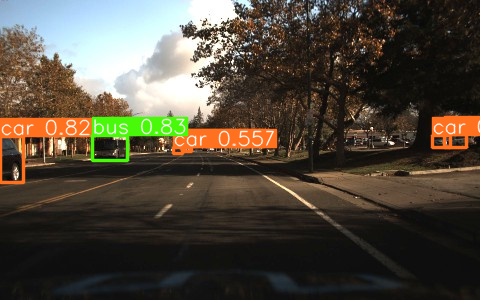

In [27]:
# showing the resluts
detectedyolov5l_img_result.show()

In [29]:
# you can also save the detected result image using the code below
detectedyolov5l_img_result.save() 

Saved 1 image to runs/detect/exp2


In [30]:
# you can also see the details of detected objects using the code below 

result_yolov5l_df = detectedyolov5l_img_result.pandas().xyxy[0] 
result_yolov5l_df

,xmin,ymin,xmax,ymax,confidence,class,name
0,92.492157,135.459717,127.247017,160.629868,0.834216,5,bus
1,0.204165,136.517792,23.525078,182.743591,0.823586,2,car
2,173.351517,147.086121,182.031754,153.840714,0.547004,2,car
3,432.966675,135.540192,450.648499,147.972229,0.531340,2,car
4,444.722656,134.574280,466.759888,147.866119,0.426044,2,car
5,184.618988,147.166245,191.074738,151.133942,0.271017,2,car


*** You can clearly see that there are more detections, so yolov5l is more useful if you want to detect smaller objects.**

# Step 4 | Passing a list of images to yolov5l

In [ ]:
img_list=["/kaggle/input/images-for-object-detection/yolo_2222/yolo/1478019953689774621.jpg","/kaggle/input/images-for-object-detection/yolo_2222/yolo/1478019957180061202.jpg",
"/kaggle/input/images-for-object-detection/yolo_2222/yolo/1478019957687018435.jpg","/kaggle/input/images-for-object-detection/yolo_2222/yolo/1478019959681353555.jpg"]

In [41]:
# passing the img_list to the model 
detectedyolov5l_img_list_result = yolov5l(img_list)

In [42]:
# printing the results of img_list
detectedyolov5l_img_list_result.print()

image 1/4: 300x480 3 cars
image 2/4: 300x480 5 cars, 1 bus, 1 truck
image 3/4: 300x480 3 cars, 1 bus, 1 truck
image 4/4: 300x480 6 cars, 1 bus
Speed: 3.9ms pre-process, 12.0ms inference, 1.2ms NMS per image at shape (4, 3, 416, 640)


In [46]:
detectedyolov5l_img_result.pandas().xyxy 

[         xmin        ymin        xmax        ymax  confidence  class name
 0  419.882751  126.682503  462.553101  148.216690    0.636821      2  car
 1  178.567902  147.085754  191.415619  155.150696    0.448207      2  car
 2  209.032806  147.137253  220.175873  154.520660    0.445286      2  car,
          xmin        ymin        xmax        ymax  confidence  class   name
 0   97.895508  142.927338  130.448868  165.725876    0.611835      2    car
 1  176.943451  146.906937  187.761612  153.873077    0.515108      2    car
 2  127.992172  138.883392  150.398636  156.967667    0.513359      5    bus
 3  127.796387  138.777344  150.503647  157.410110    0.367352      7  truck
 4  382.095581  134.222153  400.634491  148.133087    0.328326      2    car
 5  402.412079  134.944397  422.454895  147.652618    0.327498      2    car
 6  186.704620  147.635315  192.088120  153.910797    0.324207      2    car,
          xmin        ymin        xmax        ymax  confidence  class   name
 0   